In [1]:
import numpy as np
import matplotlib.pyplot as plt

from neural_zoo import NeuralZoo
from super_input import SuperInput
from params import default_neuron_params
from soen_sim import input_signal, synapse, neuron, network

### Monosynaptic Point Neuron

[[[<soen_sim.dendrite object at 0x000002AA6CE68280>]]]
[[[<soen_sim.synapse object at 0x000002AA6CE680D0>]]]
Generating pre-defined input...
[0, 25, 50, 75, 100, 125]

running network time stepper for 1.50e+02ns (1501 time steps) ...
done running network time stepper. t_sim = 4.79596e-02s

[311.82225913379085, 8419.200996612353, 16760.446428441257, 39211.6490860742, 47396.98338833621, 78189.43147779806, 86374.76578006007]


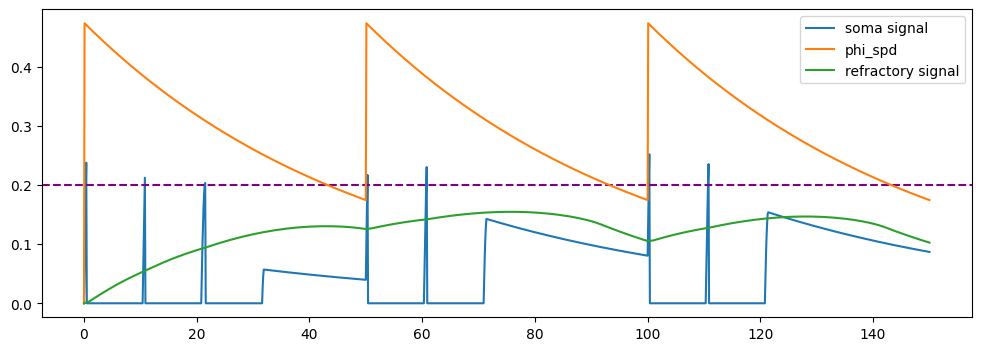

In [2]:
synaptic_structure = [[[1]]]
mono = NeuralZoo(type="custom",synaptic_structure=synaptic_structure,**default_neuron_params)

# def_spikes = [np.zeros(3).astype(int),np.array([.5,10,75])]

times = np.arange(0,150,25)
indices = np.zeros(len(times)).astype(int)
def_spikes = [indices,times]
input = SuperInput(channels=1, type='defined', defined_spikes=def_spikes, duration=150)
mono.synapses[0][0][0].add_input(input.signals[0])

net = network(name = 'network_under_test')
net.add_neuron(mono.neuron)
net.run_sim(dt = .1, tf = 150)
net.get_recordings()
print(net.neurons[1].spike_times)

spd = mono.dendrites[0][0][0].synaptic_inputs[1].phi_spd

dend_s = mono.dendrites[0][0][0].s
signal = net.neurons[1].dend__nr_ni.s
ref = net.neurons[1].dend__ref.s

plt.figure(figsize=(12,4))
plt.plot(net.t,net.signal[0], label='soma signal')
# plt.plot(net.spikes[1],net.spike_signals[0],'xk', label='neuron fires')
plt.axhline(y = mono.s_th, color = 'purple', linestyle = '--')
plt.plot(net.t,spd, label='phi_spd')
# plt.plot(net.t,dend_s, label='dendrite signal')
plt.plot(ref[::10], label='refractory signal')
plt.legend()
plt.show()